In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('Unemployment in India.csv')
df2=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
df1.shape

(768, 7)

In [4]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,1.178795e+01,1.072130e+01,0.00,4.657500e+00,8.35,1.588750e+01,76.74
Estimated Employed,740.0,7.204460e+06,8.087988e+06,49420.00,1.190404e+06,4744178.50,1.127549e+07,45777509.00
Estimated Labour Participation Rate (%),740.0,4.263012e+01,8.111094e+00,13.33,3.806250e+01,41.16,4.550500e+01,72.57


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
df1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
df1=df1.dropna()

In [8]:
df1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [9]:
def distplots(col):
    sns.distplot(df1[col])
    plt.show()

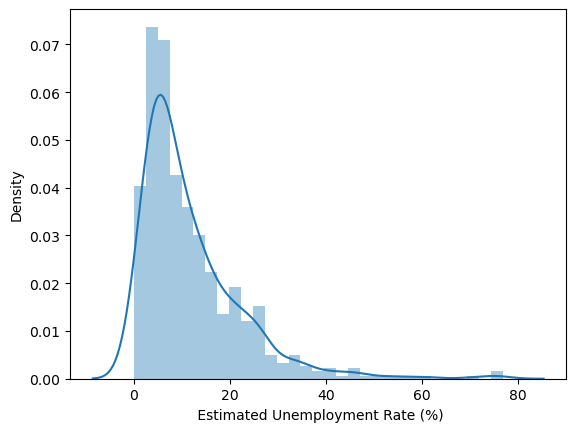

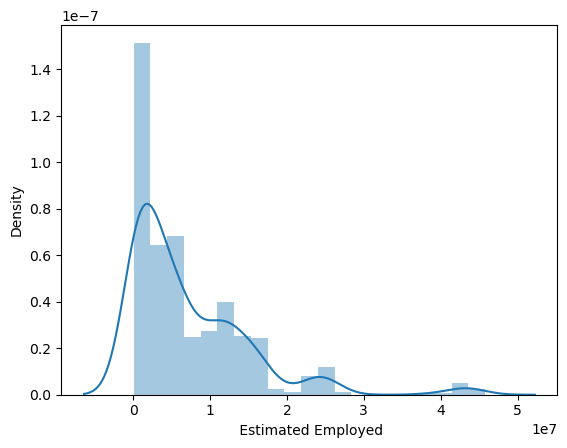

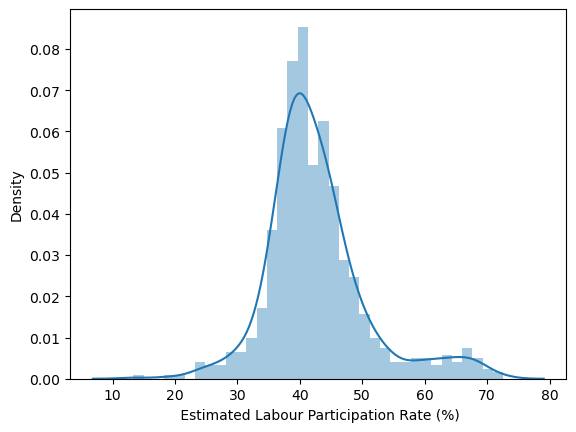

In [10]:
for i in list(df1.select_dtypes(exclude=['object']).columns):
    distplots(i)

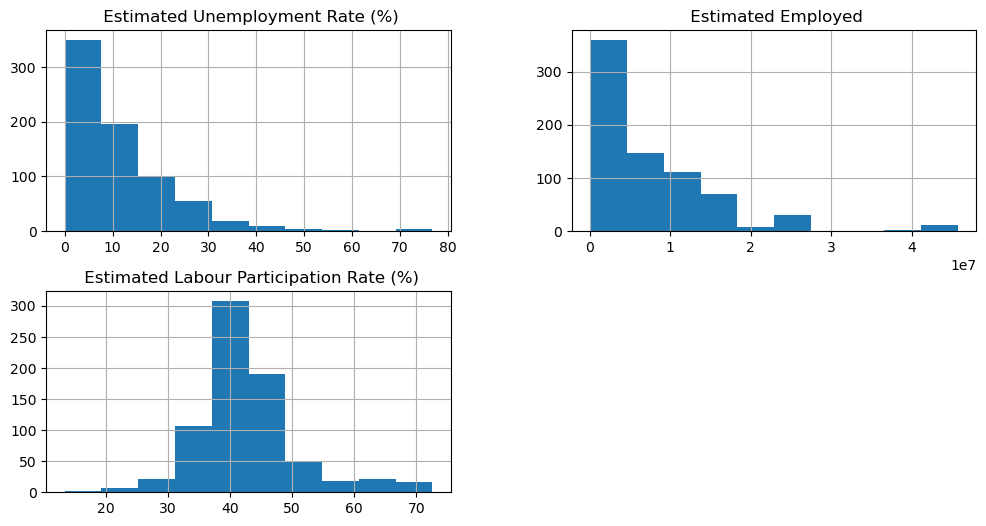

In [11]:
df1.hist(bins=10, figsize=(12,6))
plt.show()

In [12]:
df1['Region'].nunique()

28

In [13]:
df1['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

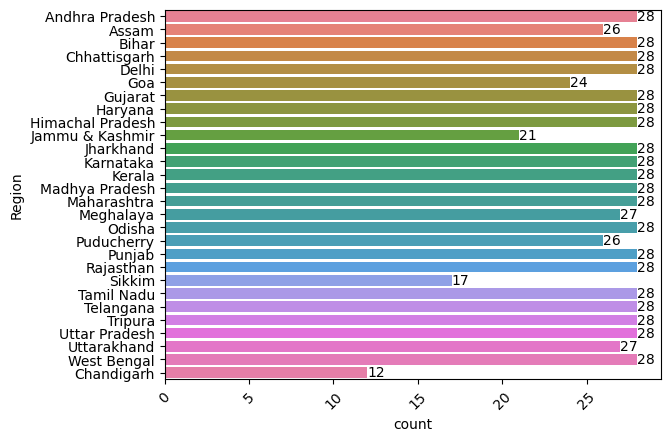

In [14]:
ax=sns.countplot(df1, y='Region', hue='Region')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks( rotation=45)
plt.show()    

In [15]:
avg_unemployment_rate=df1.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
avg_unemployment_rate

Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Delhi               16.495357
Jammu & Kashmir     16.188571
Chandigarh          15.991667
Rajasthan           14.058214
Uttar Pradesh       12.551429
Punjab              12.031071
Puducherry          10.215000
Kerala              10.123929
Tamil Nadu           9.284286
Goa                  9.274167
Chhattisgarh         9.240357
West Bengal          8.124643
Telangana            7.737857
Maharashtra          7.557500
Andhra Pradesh       7.477143
Madhya Pradesh       7.406429
Sikkim               7.249412
Karnataka            6.676071
Gujarat              6.663929
Uttarakhand          6.582963
Assam                6.428077
Odisha               5.657857
Meghalaya            4.798889
Name:  Estimated Unemployment Rate (%), dtype: float64

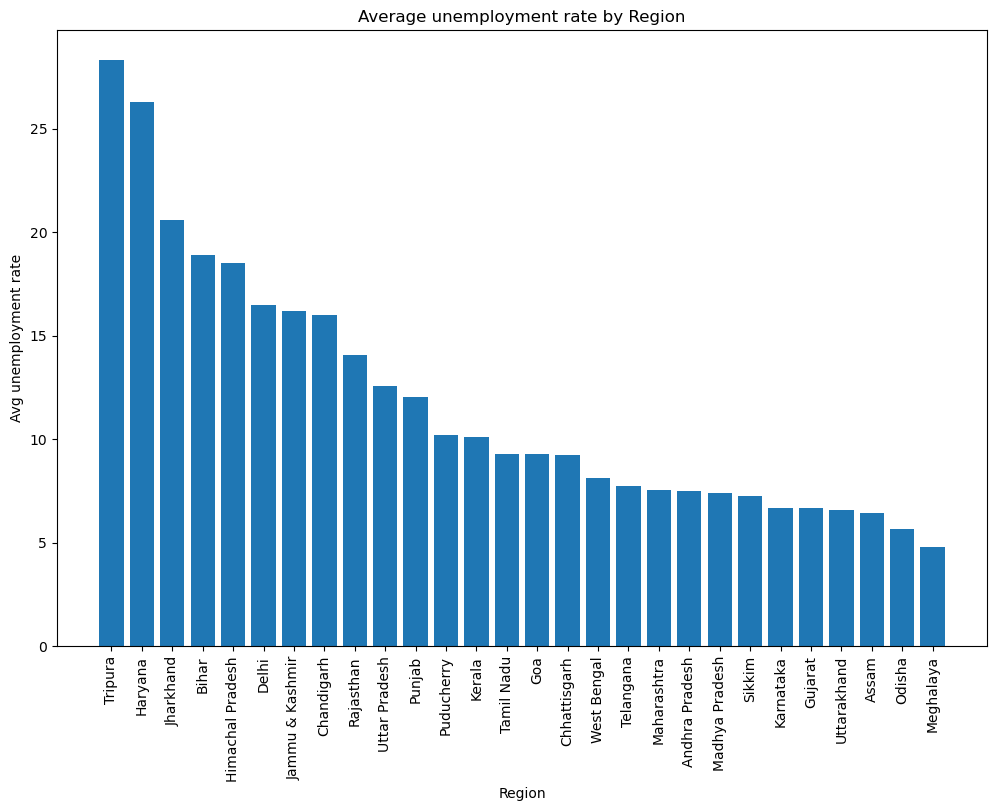

In [16]:
region=avg_unemployment_rate.index
avg_rate=avg_unemployment_rate.values

plt.figure(figsize=(12,8))
plt.bar(region, avg_rate)
plt.xlabel('Region')
plt.ylabel('Avg unemployment rate')
plt.title('Average unemployment rate by Region')
plt.xticks(rotation=90)
plt.show()

In [17]:
df1.groupby('Region')[' Estimated Employed'].mean().sort_values(ascending=False).head()

Region
Uttar Pradesh    2.809483e+07
Maharashtra      1.999020e+07
West Bengal      1.719854e+07
Bihar            1.236619e+07
Tamil Nadu       1.226955e+07
Name:  Estimated Employed, dtype: float64

In [18]:
df1['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

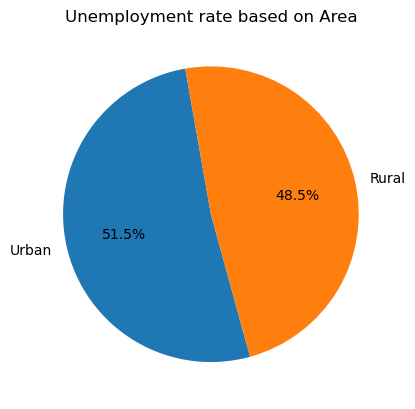

In [19]:
count=df1['Area'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=100)
plt.title('Unemployment rate based on Area')
plt.show()

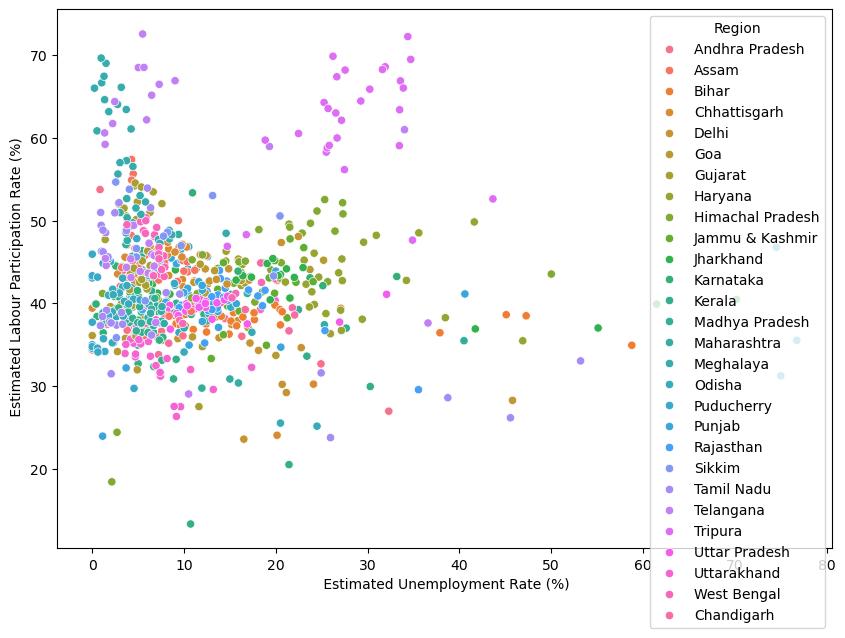

In [20]:
plt.figure(figsize=(10,7))
sns.scatterplot(df1, x=' Estimated Unemployment Rate (%)', y=' Estimated Labour Participation Rate (%)', hue='Region')
plt.show()

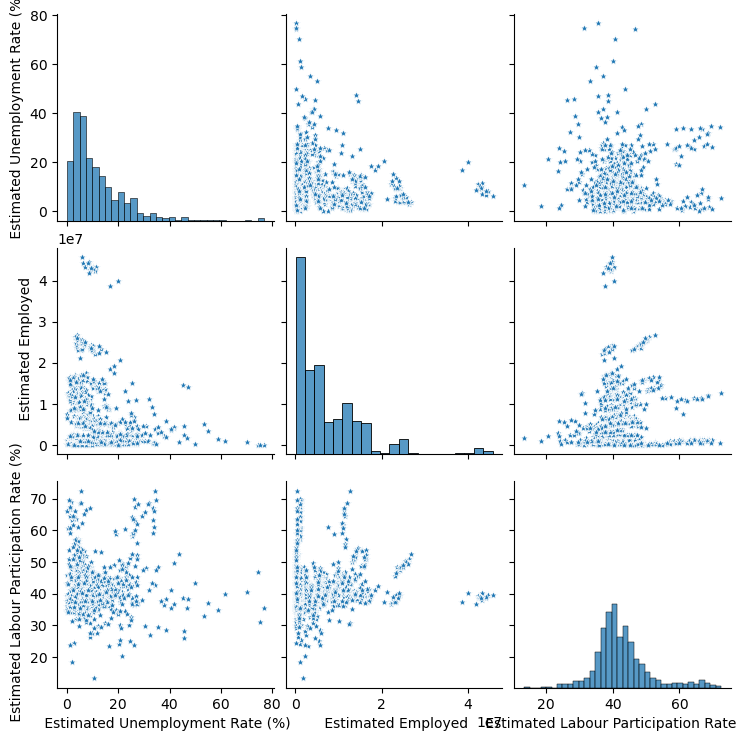

In [21]:
pair=df1[[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']]
sns.pairplot(pair, markers='*', palette='winter')
plt.show()

In [22]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [23]:
df2.shape

(267, 9)

In [24]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),267.0,1.223693e+01,1.080328e+01,0.5000,4.845000e+00,9.650000e+00,1.675500e+01,7.585000e+01
Estimated Employed,267.0,1.396211e+07,1.336632e+07,117542.0000,2.838930e+06,9.732417e+06,2.187869e+07,5.943376e+07
Estimated Labour Participation Rate (%),267.0,4.168157e+01,7.845419e+00,16.7700,3.726500e+01,4.039000e+01,4.405500e+01,6.969000e+01
longitude,267.0,2.282605e+01,6.270731e+00,10.8505,1.811240e+01,2.361020e+01,2.727840e+01,3.377820e+01
latitude,267.0,8.053242e+01,5.831738e+00,71.1924,7.608560e+01,7.901930e+01,8.527990e+01,9.293760e+01


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [26]:
df2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [27]:
df2['Region'].value_counts()

Region
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

In [28]:
df2['Region.1'].value_counts()

Region.1
North        79
South        60
West         50
East         40
Northeast    38
Name: count, dtype: int64

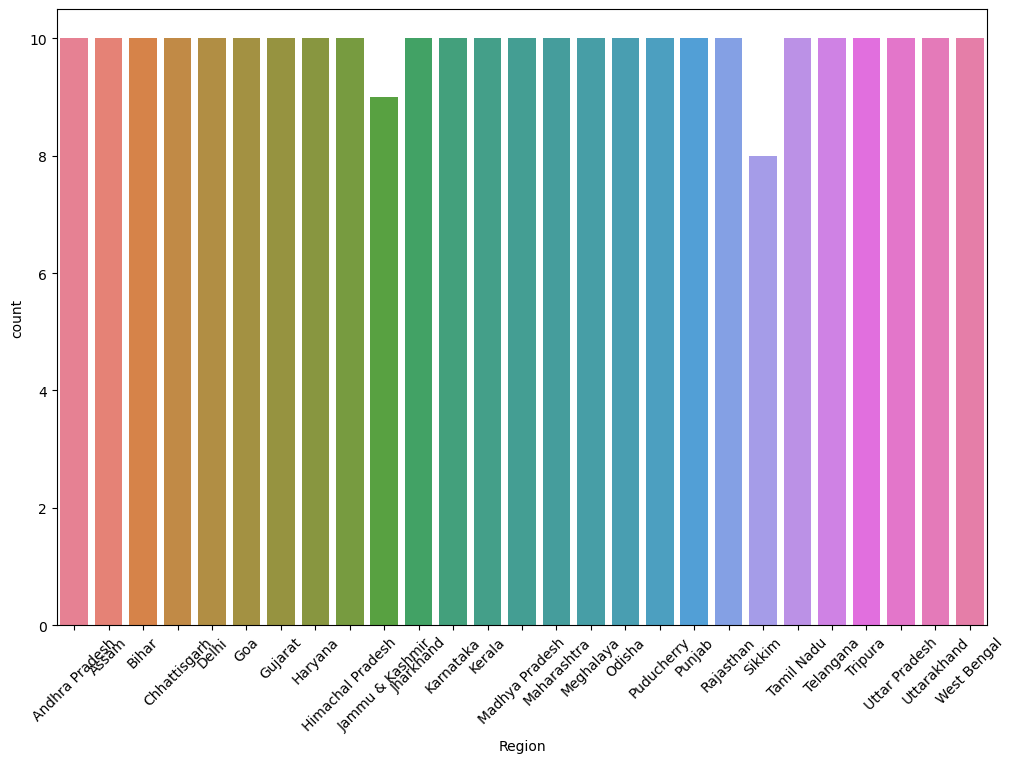

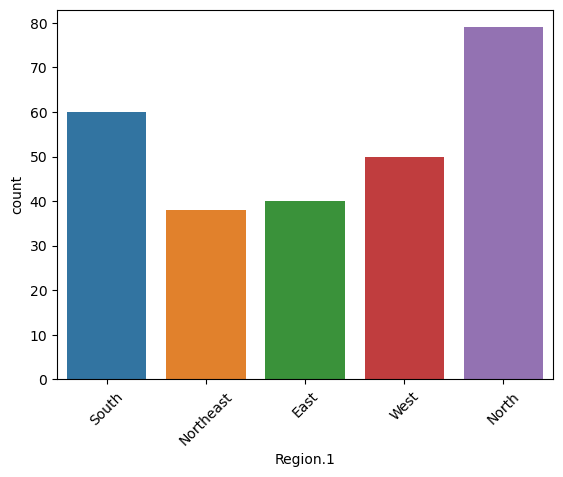

In [29]:
plt.figure(figsize=(12,8))
for col in ['Region', 'Region.1']:
    sns.countplot(df2, x=col, hue=col)
    plt.xticks(rotation=45)
    plt.show()

In [30]:
def distplots(col):
    sns.distplot(df2[col])
    plt.show()

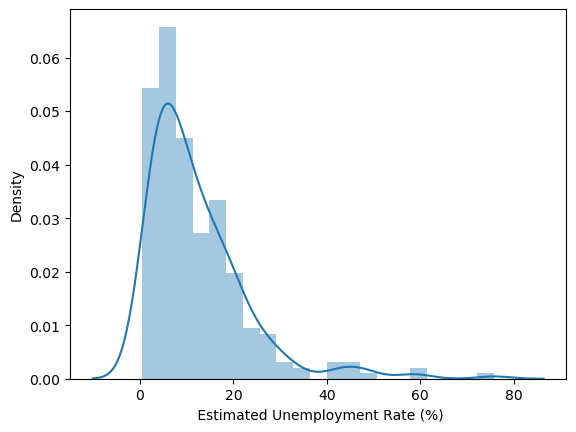

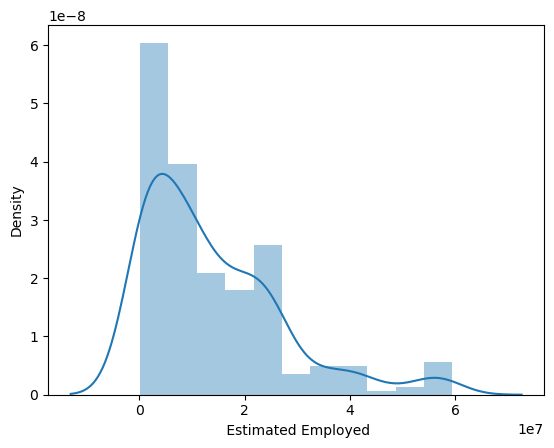

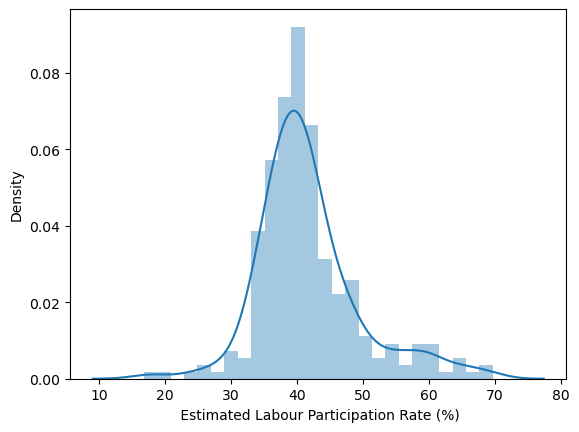

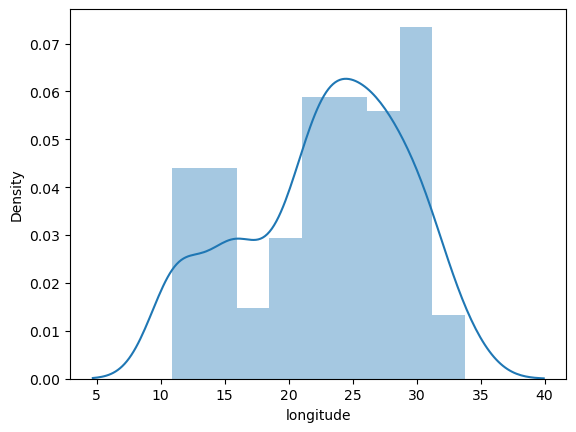

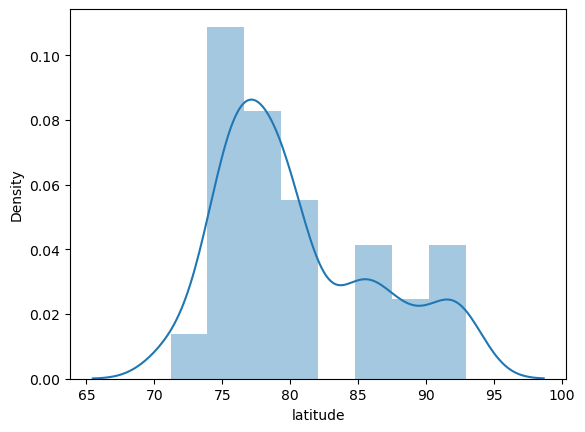

In [31]:
for i in list(df2.select_dtypes(exclude=['object']).columns):
    distplots(i)

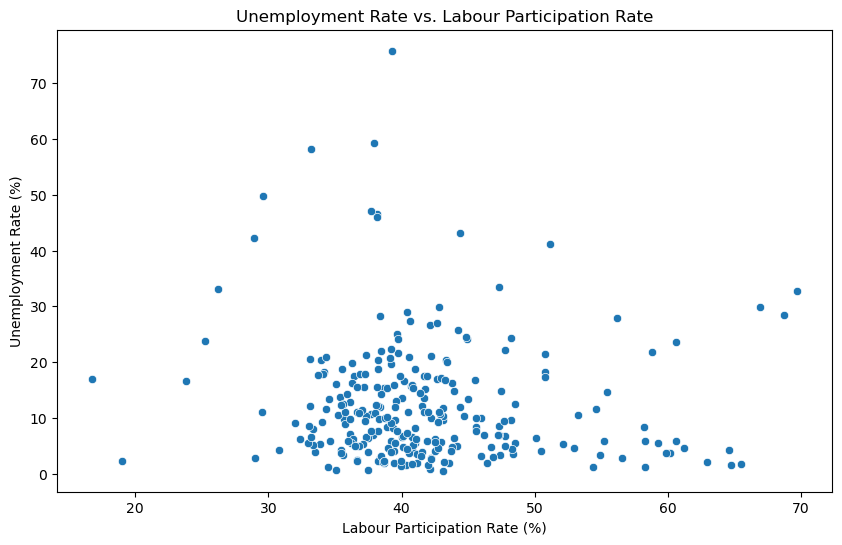

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df2, x=' Estimated Labour Participation Rate (%)', y=' Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate vs. Labour Participation Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.show()

In [33]:
df2[' Date'] = df2[' Date'].str.strip()
df2[' Date']=pd.to_datetime(df2[' Date'], format='%d-%m-%Y')

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    267 non-null    object        
 1    Date                                     267 non-null    datetime64[ns]
 2    Frequency                                267 non-null    object        
 3    Estimated Unemployment Rate (%)          267 non-null    float64       
 4    Estimated Employed                       267 non-null    int64         
 5    Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                  267 non-null    object        
 7   longitude                                 267 non-null    float64       
 8   latitude                                  267 non-null    float64       
dtypes: datetime64[ns](1), float64(4),

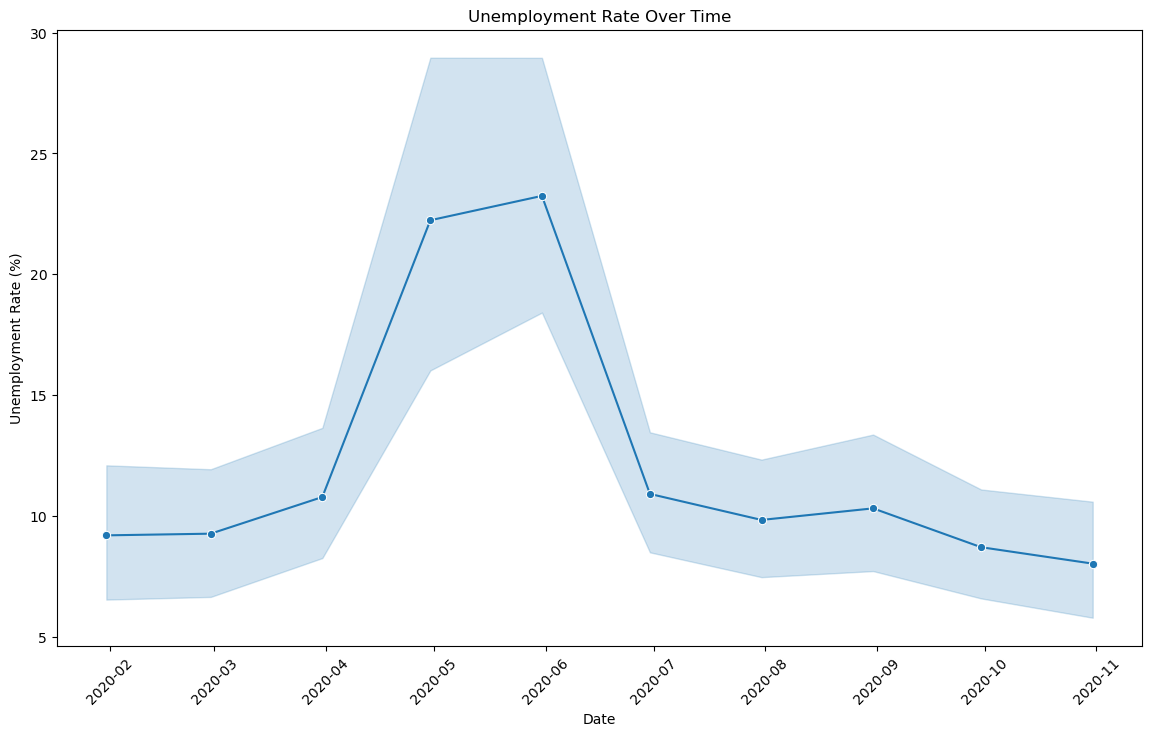

In [35]:
plt.figure(figsize=(14, 8))
sns.lineplot(df2, x=' Date', y=' Estimated Unemployment Rate (%)', marker='o')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()